In [73]:
# studio del numero dei viaggi divisi per zona
# cosa fare:
# 1 - leggere il file csv
# 2 - contare i viaggi per ogni zona
# 3 - leggere file per le zone geografiche
# 4 - unire i dati dei viaggi con le zone geografiche
# 5 - creare una mappa

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import seaborn as sns
import pathlib
import os
import seaborn as sns


city = "Boston"
year = '2022'

# 3 - leggere file per le zone geografiche
zipcode_file = pathlib.Path("/Users/gaiapizzuti/Documents/unitn/Bike-Inequality/tl_2017_us_zcta510.zip")
# Check existence
if zipcode_file.exists():
    zipcode_gdf = gpd.read_file(f"zip://{zipcode_file}")
else:
    print("File not found! Make sure it's in the current directory.")

trips_data = '/Users/gaiapizzuti/Documents/unitn/Bike-Inequality/data/trips'
stations_data = '/Users/gaiapizzuti/Documents/unitn/Bike-Inequality/data/stations'
self_loop_data = '/Users/gaiapizzuti/Documents/unitn/Bike-Inequality/data/self_loops'

color = sns.color_palette("coolwarm", as_cmap=True)
sns.set_theme(style="whitegrid")

In [74]:
def get_zipcodes(city):
    df = pd.read_csv('/Users/gaiapizzuti/Documents/unitn/Bike-Inequality/data/zipcodes.csv', dtype={'zipcode': str})
    city_zipcodes = df[df['city'] == city]['zipcode'].tolist()
    return city_zipcodes

zipcodes = get_zipcodes(city)

   zipcode  start  end
22   02133      0    0
31   02205      0    0
27   02152      0    0
25   02136    740  811
21   02132    963  898


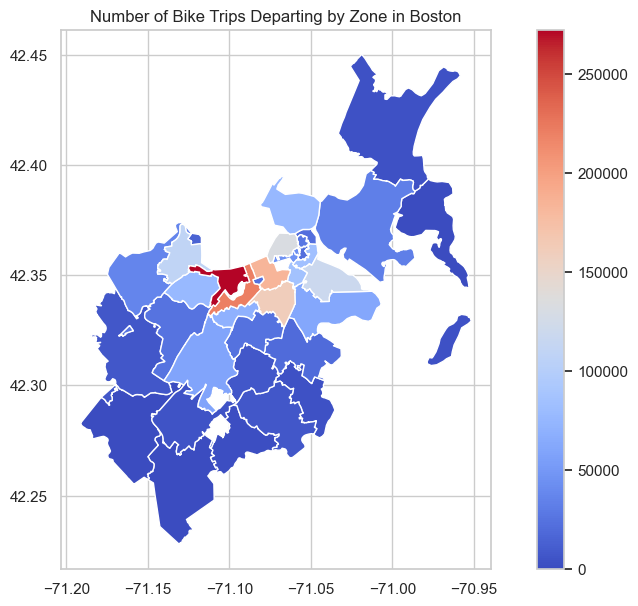

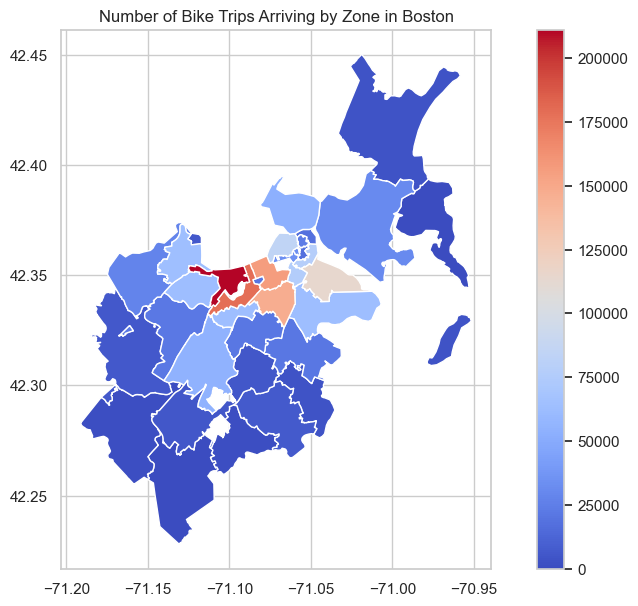

In [75]:
# 1 - leggere il file csv
trips_file = os.path.join(trips_data, year, city + '.csv')
trips_df = pd.read_csv(trips_file, dtype={'departure': str, 'arrival': str})

# 2 - contare i viaggi per ogni zona
zones = dict()
for zipcode in zipcodes:
    zones[zipcode] = {'start': 0, 'end': 0}

for index, row in trips_df.iterrows():
    start_zone = row['departure']
    end_zone = row['arrival']

    if start_zone not in zones:
        continue

    zones[start_zone]['start'] += row['trips']
    
    if end_zone not in zones:
        continue
    
    zones[end_zone]['end'] += row['trips']

zones_df = pd.DataFrame.from_dict(zones, orient='index').reset_index()
zones_df.rename(columns={"index": "zipcode"}, inplace=True)
zipcode_gdf.rename(columns={"ZCTA5CE10": "zipcode"}, inplace=True)

# ascending order of trips
zones_df = zones_df.sort_values(by='start', ascending=True)
print(zones_df.head())

# 3 - unire i dati dei viaggi con le zone geografiche
merged_gdf = zipcode_gdf.merge(zones_df, on='zipcode', how='right')

# 4 - creare una mappa
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
merged_gdf.plot(column='start', ax=ax, legend=True, cmap=color)
ax.set_title(f"Number of Bike Trips Departing by Zone in {city}")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
merged_gdf.plot(column='end', ax=ax, legend=True, cmap=color)
ax.set_title(f"Number of Bike Trips Arriving by Zone in {city}")
sns.set_style("whitegrid")
plt.show()

  zipcode  stations
0   02108         3
1   02109         3
2   02110         7
3   02111         5
4   02113         1


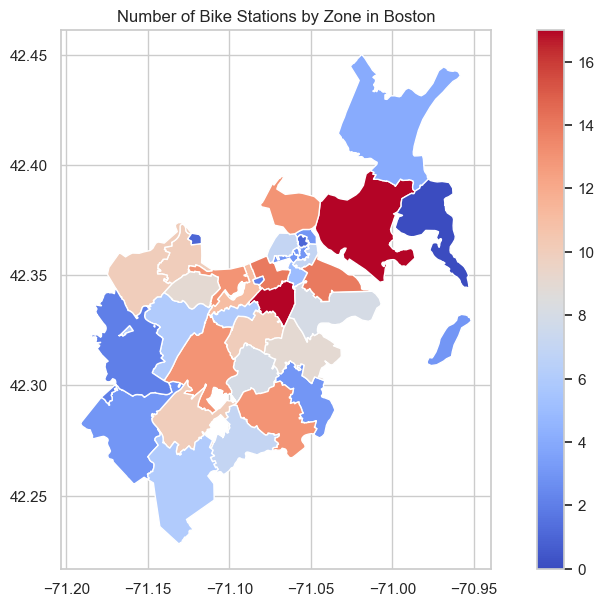

In [76]:
# studio del numero delle stazioni per zona
# cosa fare:
# 1 - leggere il file csv delle stazioni
# 2 - contare le stazioni per ogni zona
# 3 - unire i dati delle stazioni con le zone geografiche
# 4 - creare una mappa

stations_file = os.path.join(stations_data, year, city + '.csv')
stations_df = pd.read_csv(stations_file, encoding='cp1252', dtype={'zipcode': str})

zones = dict()
for zipcode in zipcodes:
    zones[zipcode] = 0

for index, row in stations_df.iterrows():
    zone = row['zipcode']
    
    if zone not in zones:
        continue
    
    zones[zone] += 1

zones_df = pd.DataFrame.from_dict(zones, orient='index').reset_index()
zones_df.rename(columns={"index": "zipcode", 0: "stations"}, inplace=True)
print(zones_df.head())
# unire i dati delle stazioni con le zone geografiche

merged_gdf = zipcode_gdf.merge(zones_df, on='zipcode', how='right')

# creare una mappa
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
merged_gdf.plot(column='stations', ax=ax, legend=True, cmap=color, missing_kwds={
    "color": "lightgrey",
    "edgecolor": "grey",
    "hatch": "///",
    "label": "No data"
})
ax.set_title(f"Number of Bike Stations by Zone in {city}")
sns.set_style("whitegrid")
plt.show()


{'02119': {'growth': 0.5256583149975158, 'trips_2021': 28178, 'trips_2022': 42990}, '02467': {'growth': 0.20516041747197525, 'trips_2021': 10348, 'trips_2022': 12471}, '02115': {'growth': 0.30692944923552146, 'trips_2021': 270642, 'trips_2022': 353710}, '02110': {'growth': 0.18055843288907303, 'trips_2021': 130329, 'trips_2022': 153861}, '02445': {'growth': 0.03118957738698094, 'trips_2021': 43444, 'trips_2022': 44799}, '02134': {'growth': 0.17989946100938242, 'trips_2021': 110206, 'trips_2022': 130032}, '02132': {'growth': 0.3413391557496361, 'trips_2021': 1374, 'trips_2022': 1843}, '02203': {'growth': 0.21018985904668752, 'trips_2021': 57253, 'trips_2022': 69287}, '02126': {'growth': 0.27167876975651434, 'trips_2021': 2341, 'trips_2022': 2977}, '02205': {'growth': 1, 'trips_2021': 0, 'trips_2022': 0}, '02108': {'growth': 0.3123235082408963, 'trips_2021': 54181, 'trips_2022': 71103}, '02122': {'growth': 0.4935412026726058, 'trips_2021': 4490, 'trips_2022': 6706}, '02124': {'growth': 0

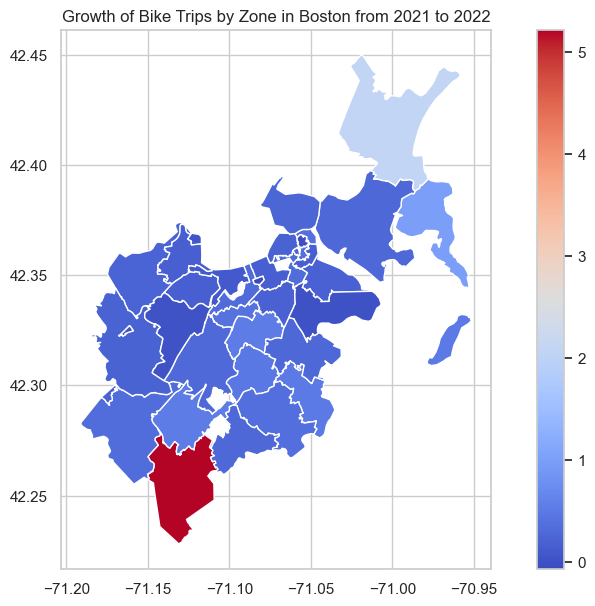

In [77]:
# analisi dell'aumento dell'uso di bike sharing nel tempo
# cosa fare:
# 1 - leggere il file csv dei viaggi 2021 e 2022
# 2 - calcolare l'aumento percentuale dei viaggi per ogni zona
# 3 - unire i dati con le zone geografiche
# 4 - creare una mappa

year = '2021'
year_after = '2022'
city = 'Boston'

trips_file = os.path.join(trips_data, year, city + '.csv')
trips_df_2021 = pd.read_csv(trips_file, dtype={'departure': str, 'arrival': str})

trips_file = os.path.join(trips_data, year_after, city + '.csv')
trips_df_2022 = pd.read_csv(trips_file, dtype={'departure': str, 'arrival': str})

# calcolare l'aumento percentuale dei viaggi per ogni zona
zones_2021 = dict()
for zipcode in zipcodes:
    zones_2021[zipcode] = 0

for index, row in trips_df_2021.iterrows():
    start_zone = row['departure']
    end_zone = row['arrival']
    
    if start_zone not in zones_2021:
        continue
    if end_zone not in zones_2021:
        continue
    
    zones_2021[start_zone] += row['trips']
    zones_2021[end_zone] += row['trips']

zones_2022 = dict()
for zipcode in zipcodes:
    zones_2022[zipcode] = 0
for index, row in trips_df_2022.iterrows():
    start_zone = row['departure']
    end_zone = row['arrival']
    
    if start_zone not in zones_2022:
        continue
    if end_zone not in zones_2022:
        continue
    
    zones_2022[start_zone] += row['trips']
    zones_2022[end_zone] += row['trips']

zones_growth = dict()
for zone in set(list(zones_2021.keys()) + list(zones_2022.keys())):
    trips_2021 = zones_2021.get(zone, 0)
    trips_2022 = zones_2022.get(zone, 0)
    
    if trips_2021 == 0:
        growth = 1
    else:
        growth = (trips_2022 - trips_2021) / trips_2021

    if zone not in zones_growth:
        zones_growth[zone] = dict()
    
    zones_growth[zone]['growth'] = growth
    zones_growth[zone]['trips_2021'] = trips_2021
    zones_growth[zone]['trips_2022'] = trips_2022

print(zones_growth)
zones_growth_df = pd.DataFrame.from_dict(zones_growth, orient='index').reset_index()
zones_growth_df.rename(columns={"index": "zipcode", 0: "growth"}, inplace=True)
print(zones_growth_df.head())

# order by growth descending
zones_growth_df = zones_growth_df.sort_values(by='growth', ascending=False)
print(zones_growth_df.head())
# unire i dati con le zone geografiche
merged_gdf = zipcode_gdf.merge(zones_growth_df, on='zipcode', how='right')
# creare una mappa
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
merged_gdf.plot(column='growth', ax=ax, legend=True, cmap=color)
ax.set_title(f"Growth of Bike Trips by Zone in {city} from {year} to {year_after}")
sns.set_style("whitegrid")
plt.show()

  zipcode  growth  stations_2021  stations_2022
0   02119     0.0             10             10
1   02467     0.0              2              2
2   02115     0.0             11             11
3   02110     0.0              7              7
4   02445     0.0              6              6


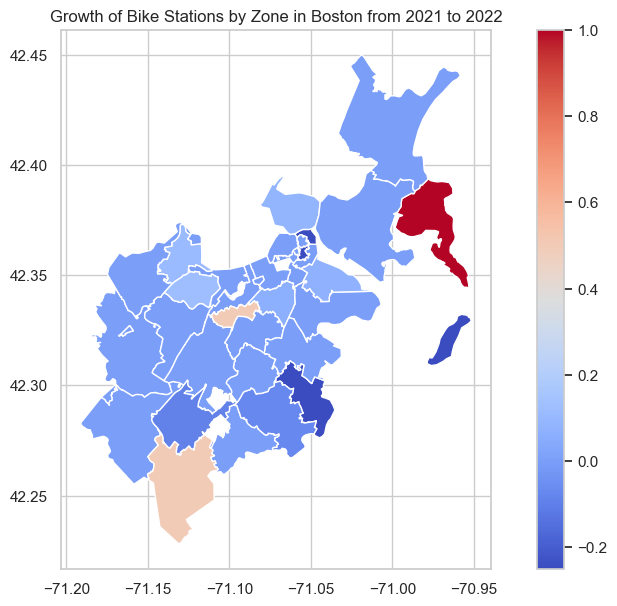

In [78]:
# analisi dell'aumento delle stazioni nel tempo

# cosa fare:
# 1 - leggere il file csv delle stazioni 2021 e 2022
# 2 - calcolare l'aumento percentuale delle stazioni per ogni zona
# 3 - unire i dati con le zone geografiche
# 4 - creare una mappa

year = '2021'
year_after = '2022'

stations_file = os.path.join(stations_data, year, city + '.csv')
stations_df_2021 = pd.read_csv(stations_file, encoding='cp1252', dtype={'zipcode': str})

stations_file = os.path.join(stations_data, year_after, city + '.csv')
stations_df_2022 = pd.read_csv(stations_file, encoding='cp1252', dtype={'zipcode': str})

# calcolare l'aumento percentuale delle stazioni per ogni zona
zones_2021 = dict()
for zipcode in zipcodes:
    zones_2021[zipcode] = 0

for index, row in stations_df_2021.iterrows():
    zone = row['zipcode']
    
    if zone not in zones_2021:
        continue
    
    zones_2021[zone] += 1

zones_2022 = dict()
for zipcode in zipcodes:
    zones_2022[zipcode] = 0

for index, row in stations_df_2022.iterrows():
    zone = row['zipcode']
    
    if zone not in zones_2022:
        continue
    
    zones_2022[zone] += 1

zones_growth = dict()
for zone in set(list(zones_2021.keys()) + list(zones_2022.keys())):
    stations_2021 = zones_2021.get(zone, 0)
    stations_2022 = zones_2022.get(zone, 0)
    
    if stations_2021 == 0:
        growth = 1
    else:
        growth = (stations_2022 - stations_2021) / stations_2021

    if zone not in zones_growth:
        zones_growth[zone] = dict()
    
    zones_growth[zone]['growth'] = growth
    zones_growth[zone]['stations_2021'] = stations_2021
    zones_growth[zone]['stations_2022'] = stations_2022

zones_growth_df = pd.DataFrame.from_dict(zones_growth, orient='index').reset_index()
zones_growth_df.rename(columns={"index": "zipcode", 0: "growth"}, inplace=True)
print(zones_growth_df.head())
# unire i dati con le zone geografiche

merged_gdf = zipcode_gdf.merge(zones_growth_df, on='zipcode', how='right')
# creare una mappa
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
merged_gdf.plot(column='growth', ax=ax, legend=True, cmap=color)
ax.set_title(f"Growth of Bike Stations by Zone in {city} from {year} to {year_after}")
sns.set_style("whitegrid")
plt.show()

   zipcode  self_loops  total_trips  percentage
43   02128       29892        32174    0.929073
50   02151        2421         3801    0.636938
35   02124        3782         6846    0.552439
49   02136         429          818    0.524450
5    02125        9133        21805    0.418849


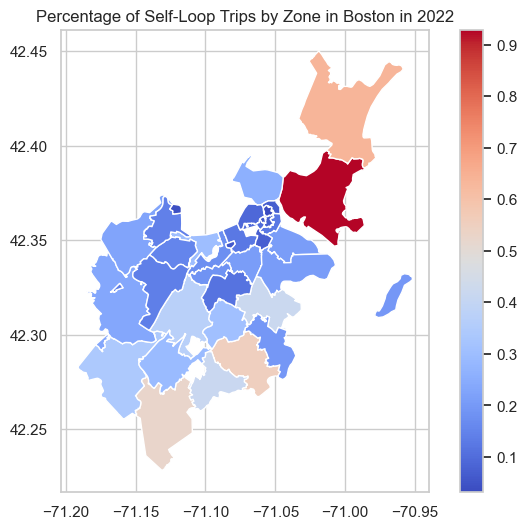

In [ ]:
# studio del numero di viaggi che iniziano e finiscono nella stessa zona (percentuale)
# cosa fare:
# 1 - leggere il file csv
# 2 - calcolare la percentuale
# 3 - unire i dati con le zone geografiche
# 4 - visualizzare i risultati nella mappa

year = '2022'
city = 'Boston'

# trip aggregati a tutto l'anno che partono dalle 7 alle 9 di mattina
# si dovrebbe avere un picco di partenza + mezz'ora

# mappa dell'uso dei viaggi 24 volte, una per ogni ora -> in particolare 7-9

self_loop_df = pd.read_csv(os.path.join(self_loop_data, year, city + '.csv'), dtype={'zipcode': str})

# tenere solo i zipcode presenti nella lista
self_loop_df = self_loop_df[self_loop_df['zipcode'].isin(zipcodes)]

# aggiungere la colonna percentuale
self_loop_df['percentage'] = (self_loop_df['self_loops'] / self_loop_df['total_trips'])

# order by percentage descending
self_loop_df = self_loop_df.sort_values(by='percentage', ascending=False)
print(self_loop_df.head())

fix, ax = plt.subplots(figsize=(8, 6))
merged_gdf = zipcode_gdf.merge(self_loop_df, on='zipcode', how='right')
merged_gdf.plot(column='percentage', ax=ax, legend=True, cmap=color)
ax.set_title(f"Percentage of Self-Loop Trips by Zone in {city} in {year}")
sns.set_style("whitegrid")
plt.show()